In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn as nn
import matplotlib.pyplot as plt 
from DCGAN import Generator, Discriminator, weights_init
import numpy as np
from tqdm import tqdm

In [2]:
## Import Dataset
img_size = 64
transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize(img_size),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.5], std=[0.5])
])
mnist_data = torchvision.datasets.MNIST('/home/harsha/Deep Learning/Torchvision_Datasets', train=True, download=True, transform=transform)
noi = len(mnist_data)
mnist_data = DataLoader(mnist_data, batch_size = 64, shuffle = True)

tensor([6, 4, 4, 4, 3, 5, 1, 4, 6, 1, 2, 7, 6, 7, 9, 5, 8, 8, 9, 8, 5, 2, 8, 1,
        0])


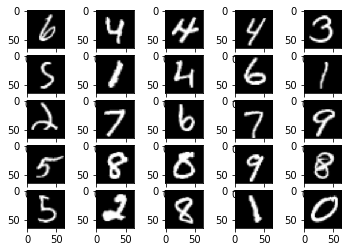

In [3]:
batch_idx, (example_data, example_targets) = next(enumerate(mnist_data))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(example_data[i][0].numpy(), cmap='gray', interpolation='none')
print(example_targets[:25])

In [4]:
## CUDA Devie Initialization
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('Device Name:', torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')

Device Name: GeForce GTX 1050 Ti


In [5]:
gen = Generator(100).to(device)
gen.apply(weights_init)
dis = Discriminator(1).to(device)
dis.apply(weights_init)

## Generator
print(gen)
## Discriminator
print(dis)

Generator(
  (gen): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)
D

In [6]:
## Model Parameters
OPTIMIZER_GEN = Adam(gen.parameters(), lr = 0.0002, betas = (0.5, 0.99))
OPTIMIZER_DIS = Adam(dis.parameters(), lr = 0.0002, betas = (0.5, 0.99))
LOSS_CRITERION = nn.BCELoss()
EPOCHS = 10

In [7]:

for epoch in range(EPOCHS):
    
    epoch_loss = {'gen_loss':0, 'dis_loss':0}
    print('[Epoch: {} / {}]'.format(epoch+1, EPOCHS))
    
    for batch in tqdm(mnist_data):
        
        images,_ = batch
        images = images.to(device)
        
        ## Retrive the Batch Size
        bs = images.size(0)
        noise = torch.randn(bs,100,1,1).to(device)
        
        ## Clear the accumulated gradients
        dis.zero_grad()
        
        ## Labels for Real Images
        target = torch.ones(bs, device = device)
        
        ## Predictions by Discriminator for Real Images        
        dis_out = dis(images).squeeze()
        d_x = dis_out.mean().item()
                
        ## Calculate the error for Real Images
        dis_real_loss = LOSS_CRITERION(dis_out, target)
        dis_real_loss.backward()
        
        ## Generate images from noise
        gen_fake_out = gen(noise)
        
        ## Labels for Fake Images
        target = torch.zeros(bs, device = device)
        
        ## Predictions by Discriminator for Fake Images   
        dis_out = dis(gen_fake_out.detach()).squeeze()
        d_z1 = dis_out.mean().item()
        
        
        ## Calculate the error for Fake Images
        dis_fake_loss = LOSS_CRITERION(dis_out, target)
        dis_fake_loss.backward()
        
        ## Update the EPOCH Loss
        epoch_loss['dis_loss'] += (dis_real_loss + dis_fake_loss).item()
        
        ## Update the parameters
        OPTIMIZER_DIS.step()
        
        ## Clear the accumulated gradients
        gen.zero_grad()
        
        ## Labels for Real Images
        target = torch.ones(bs, device = device)
        
        ## Predictions by Discriminator for Fake Images
        dis_out = dis(gen_fake_out.detach()).squeeze()
        d_z2 = dis_out.mean().item()
        
        ## Calculate the error for Generator
        gen_loss = LOSS_CRITERION(dis_out, target)
        gen_loss.backward()
        
        ## Update the parameters
        OPTIMIZER_GEN.step()
        
        epoch_loss['gen_loss'] += gen_loss.item()
        
    print('Generator Loss: {} | Discriminator Loss: {}'.format(epoch_loss['gen_loss']/noi, epoch_loss['dis_loss']/noi))
    print('D(x): {} | D(G(z)): {} / {}'.format(d_x, d_z1, d_z2))
        
        
        

  0%|          | 0/938 [00:00<?, ?it/s]

[Epoch: 1 / 10]


  0%|          | 1/938 [00:00<02:36,  5.97it/s]

Generator Loss: 0.2087367842992147 | Discriminator Loss: 2.9401489552419472e-05
D(x): 0.9999999403953552 | D(G(z)): 1.5739695413685695e-07 / 1.565000644632164e-07
[Epoch: 2 / 10]


 56%|█████▌    | 526/938 [01:29<01:08,  5.99it/s]

KeyboardInterrupt: 

In [ ]:
label  = torch.ones(bs, device = device)

In [1]:
import keras
from keras import applications
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from keras.layers import Input
from keras.layers.merge import _Merge
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
from keras.models import load_model, model_from_json, Model

Using TensorFlow backend.


In [ ]:
img_shape_3 = (224, 224, 3)

input_img = Input(shape=img_shape_3)


# VGG16 without top layers
VGG_model = applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_ = Model(VGG_model.input,VGG_model.layers[-6].output)
model = model_(input_img)

global_features = keras.layers.Conv2D(512, (3, 3), padding='same', strides=(2, 2), activation='relu')(model)
global_features = keras.layers.BatchNormalization()(global_features)
global_features = keras.layers.Conv2D(512, (3, 3), padding='same', strides=(1, 1), activation='relu')(global_features)
global_features = keras.layers.BatchNormalization()(global_features)

global_features = keras.layers.Conv2D(512, (3, 3), padding='same', strides=(2, 2), activation='relu')(global_features)
global_features = keras.layers.BatchNormalization()(global_features)
global_features = keras.layers.Conv2D(512, (3, 3), padding='same', strides=(1, 1), activation='relu')(global_features)
global_features = keras.layers.BatchNormalization()(global_features)

global_features2 = keras.layers.Flatten()(global_features)
global_features2 = keras.layers.Dense(1024)(global_features2)
global_features2 = keras.layers.Dense(512)(global_features2)
global_features2 = keras.layers.Dense(256)(global_features2)
global_features2 = keras.layers.RepeatVector(28*28)(global_features2)
global_features2 = keras.layers.Reshape((28,28, 256))(global_features2)

global_featuresClass = keras.layers.Flatten()(global_features)
global_featuresClass = keras.layers.Dense(4096)(global_featuresClass)
global_featuresClass = keras.layers.Dense(4096)(global_featuresClass)
global_featuresClass = keras.layers.Dense(1000, activation='softmax')(global_featuresClass)

# Midlevel Features

midlevel_features = keras.layers.Conv2D(512, (3, 3),  padding='same', strides=(1, 1), activation='relu')(model)
midlevel_features = keras.layers.BatchNormalization()(midlevel_features)
midlevel_features = keras.layers.Conv2D(256, (3, 3),  padding='same', strides=(1, 1), activation='relu')(midlevel_features)
midlevel_features = keras.layers.BatchNormalization()(midlevel_features)

# fusion of (VGG16 + Midlevel) + (VGG16 + Global)
modelFusion = keras.layers.concatenate([midlevel_features, global_features2])